<a href="https://colab.research.google.com/github/oscarcasas21/Faster-RCNN/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version
# We need to install the correct cuDNN according to this output

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [59]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [60]:
import os
os.environ['GPU_TYPE'] = str(os.popen('nvidia-smi --query-gpu=name --format=csv,noheader').read())

def getGPUArch(argument):
  try:
    argument = argument.strip()
    # All Colab GPUs
    archTypes = {
        "Tesla V100-SXM2-16GB": "-gencode arch=compute_70,code=[sm_70,compute_70]",
        "Tesla K80": "-gencode arch=compute_37,code=sm_37",
        "Tesla T4": "-gencode arch=compute_75,code=[sm_75,compute_75]",
        "Tesla P40": "-gencode arch=compute_61,code=sm_61",
        "Tesla P4": "-gencode arch=compute_61,code=sm_61",
        "Tesla P100-PCIE-16GB": "-gencode arch=compute_60,code=sm_60"

      }
    return archTypes[argument]
  except KeyError:
    return "GPU must be added to GPU Commands"
os.environ['ARCH_VALUE'] = getGPUArch(os.environ['GPU_TYPE'])

print("GPU Type: " + os.environ['GPU_TYPE'])
print("ARCH Value: " + os.environ['ARCH_VALUE'])

GPU Type: NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.


ARCH Value: GPU must be added to GPU Commands


In [64]:
%cd ..
!git clone https://github.com/oscarcasas21/Faster-RCNN
%cd Faster-RCNN
!pip install requirements.txt

/content/Faster-RCNN/keras-frcnn/Faster-RCNN/Faster-RCNN
fatal: destination path 'Faster-RCNN' already exists and is not an empty directory.
/content/Faster-RCNN/keras-frcnn/Faster-RCNN/Faster-RCNN/Faster-RCNN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt


In [52]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import tensorflow as tf

Using TensorFlow backend.


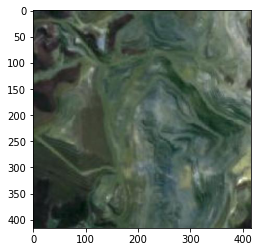

In [20]:
# reading single image using imread function of matplotlib
image = plt.imread('train/nomine859_jpeg.rf.02f78ebd610a45f3ebe9f68e66642209.jpg')
plt.imshow(image)

In [22]:
!git clone https://github.com/kbardool/keras-frcnn.git

Cloning into 'keras-frcnn'...
remote: Enumerating objects: 635, done.
remote: Total 635 (delta 0), reused 0 (delta 0), pack-reused 635
Receiving objects: 100% (635/635), 187.79 KiB | 847.00 KiB/s, done.
Resolving deltas: 100% (433/433), done.


In [48]:
%cd Faster-RCNN/
data = pd.read_csv('train/_annotations.csv')
newdata = data['nomine642_jpeg.rf.0092b4f312400f3b81e28e7a16290d95.jpg']
for i in range(data.shape[0]):
    newdata[i] = data['nomine642_jpeg.rf.0092b4f312400f3b81e28e7a16290d95.jpg'][i] + ',' + str(data['29'][i]) + ',' + str(data['0'][i]) + ',' + str(data['354'][i]) + ',' + str(data['272'][i]) + ',' + data['Tailings'][i]
%cd keras-frcnn
newdata.to_csv('annotate.txt', header=None, index=None, sep=' ')

[Errno 2] No such file or directory: 'Faster-RCNN/'
/content/Faster-RCNN
/content/Faster-RCNN/keras-frcnn


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
!python train_frcnn.py -o simple -p annotate.txt

Using TensorFlow backend.
Traceback (most recent call last):
  File "train_frcnn.py", line 11, in <module>
    from keras import backend as K
  File "/usr/local/lib/python3.7/dist-packages/keras/__init__.py", line 4, in <module>
    from . import applications
  File "/usr/local/lib/python3.7/dist-packages/keras/applications/__init__.py", line 1, in <module>
    from .vgg16 import VGG16
  File "/usr/local/lib/python3.7/dist-packages/keras/applications/vgg16.py", line 14, in <module>
    from ..models import Model
  File "/usr/local/lib/python3.7/dist-packages/keras/models.py", line 14, in <module>
    from . import layers as layer_module
  File "/usr/local/lib/python3.7/dist-packages/keras/layers/__init__.py", line 4, in <module>
    from ..engine import Layer
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/__init__.py", line 8, in <module>
    from .training import Model
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 24, in <module>
    from 

In [32]:
python test_frcnn.py -p test_images

SyntaxError: ignored